In [38]:
## Time evolution of gauusain wave packet
# 18/08/2022

# Solving the 1-D Schrodinger Equation
$$ i \hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2\psi}{\partial x^2} + V(x)\psi $$

## Discretization (after dimensional analysis)

$$ i \frac{d\phi}{dt} = H \phi $$

where

$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  


Formal solution:  

$$ \phi(t) = e^{-i H t} \phi(0) $$

Strategy:  
1. Solve for eigenvalues and eigenvectors of $H$  

$$ H \phi_n = \epsilon_n \phi_n $$  

2. Expand $\phi(0)$ in the basis of eigenvectors  

$$ \phi(0) = \sum_n c_n \phi_n $$  
where $c_n = \phi_n^{\dagger} \phi(0)$  

3. The state $\phi(t)$ is then given by  

\begin{eqnarray*}
\phi(t) &=& e^{-i H t} \phi(0) \\
&=& \sum_n c_n e^{-i\epsilon_n t}\phi_n
\end{eqnarray*}

## Time evolution of free particle

Initial wavefunction: Gaussian

In [39]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [40]:
delta = 0.1
L = 20 
N = 150 
dimension = 2*N + 1 # Number of lattice points.
x = np.linspace(-L,L,2*N+1)

In [41]:
def kronecker(i,j):
    return 1 if i==j else 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 

In [42]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix

H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [43]:
###### The initial Gaussian wavefunction ##########
a = 1.0 ## Initial spread in units of l0
b = 0.00 ## Initial peak of the Gaussian
p0 = 0.0 ## Mean momentum in units of hbar/l0

In [44]:
def psi0(y):
    return (1/pow(2*np.pi*(a**2),0.25))*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*p0*y)

In [45]:
Psi0 = np.sqrt(delta)*np.array( [psi0(delta*i) for i in range(-N,N+1)], 'complex' )

In [46]:
def Psi(t):
    sum = np.zeros(dimension, 'complex')
    for n in range(dimension):
        c = np.vdot(Psi0, H_eigenvectors[:,n]) # nth expansion coefficient 
        E = H_eigenvalues[n]
        sum += c * np.exp(-E*t*1.0j) * H_eigenvectors[:,n]
    return sum

def Prob(t):
    return np.array( [abs(Psi(t)[i])**2 for i in range(dimension)] )

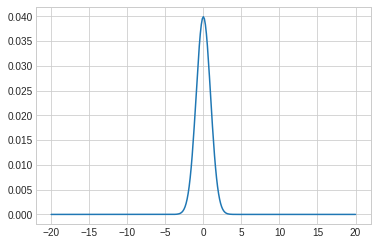

In [47]:
plt.plot(x, Prob(0))

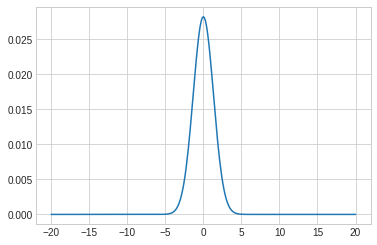

In [48]:
plt.plot(x, Prob(0.5))

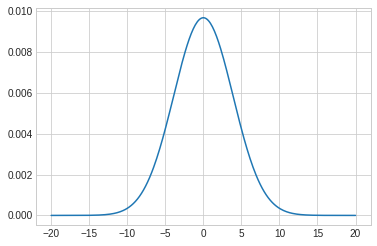

In [49]:
plt.plot(x, Prob(2.))

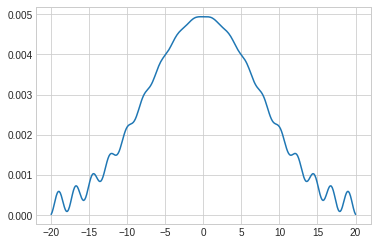

In [50]:
plt.plot(x, Prob(4.))

##Time evolution of particle under barrier potential:


In [51]:
delta = 0.5
m=3
V0=2
L = 100 
N = 200 
dimension = 2*N + 1 # Number of lattice points.
#x = np.linspace(-L,L,2*N+1)
x=np.arange(-L,L+delta, delta)
#print(len(y))
#print(len(x))
#print(2*N+1)
#print(x)
#print(y)

In [52]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(b):
    return V0 if (b>=-m and b<=m) else 0 

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [53]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix

H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [54]:
###### The initial Gaussian wavefunction ##########
a = 2.0 ## Initial spread in units of l0
b = -95.00 ## Initial peak of the Gaussian
p0 = 3.0 ## Mean momentum in units of hbar/l0

In [55]:
def psi0(y):
    return (1/pow(2*np.pi*(a**2),0.25))*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*p0*y)

In [56]:
Psi0 = np.sqrt(delta)*np.array( [psi0(delta*i) for i in range(-N,N+1)], 'complex' )

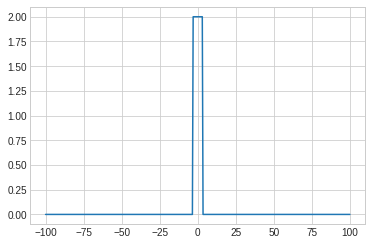

In [57]:
potential = np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice 
plt.plot(x, potential, label="Potential")

In [58]:
def Psi(t):
    sum = np.zeros(dimension, 'complex')
    for n in range(dimension):
        c = np.vdot(Psi0, H_eigenvectors[:,n]) # nth expansion coefficient 
        E = H_eigenvalues[n]
        sum += c * np.exp(-E*t*1.0j) * H_eigenvectors[:,n]
    return sum

def Prob(t):
    return np.array( [abs(Psi(t)[i])**2 for i in range(dimension)] )

In [59]:
np.dot(Prob(0).conj().T, Prob(0)) # Normalization check

0.04986778220646952

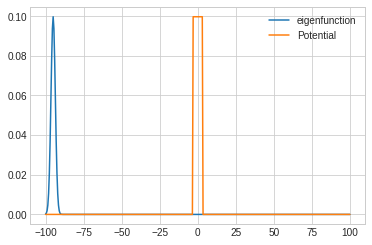

In [60]:
#plt.plot(x, Prob(0))
plt.plot(x, Prob(0), label="eigenfunction")
plt.plot(x, np.dot(Prob(0).conj().T, Prob(0))*potential, label="Potential")
plt.legend();

In [61]:
np.dot(Prob(1).conj().T, Prob(1)) # Normalization check

0.04974636009157384

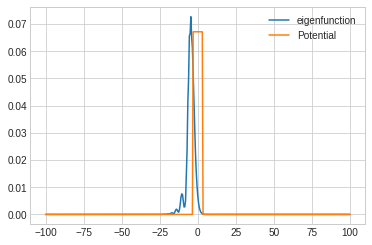

In [62]:
plt.plot(x, Prob(23), label="eigenfunction")
plt.plot(x, np.dot(Prob(23).conj().T, Prob(23))*potential, label="Potential")
plt.legend();

In [63]:
import numpy as np
ar=np.arange(1,20,4)
print(ar)

[ 1  5  9 13 17]


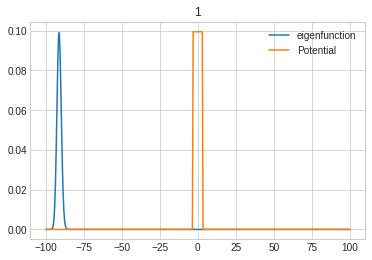

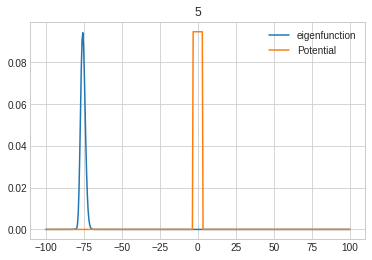

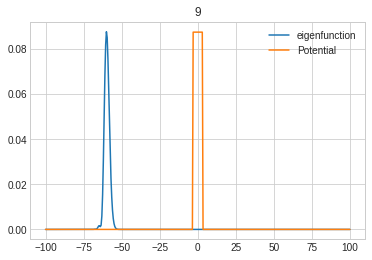

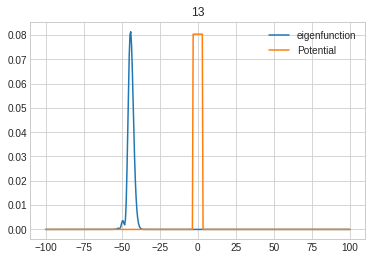

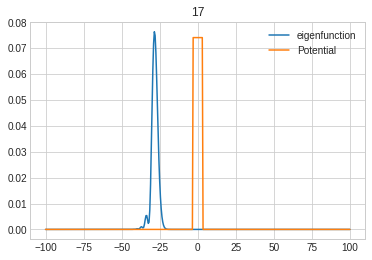

In [64]:
for i in ar:
  plt.plot(x, Prob(i), label="eigenfunction")
  plt.plot(x, np.dot(Prob(i).conj().T, Prob(i))*potential, label="Potential")
  plt.legend()
  title=str(i)
  plt.title(title)
  plt.show()

In [65]:
AR=Prob(17)
xl=x.tolist()
xarray=np.arange(-20,-m+delta, delta)
xarray2=np.arange(m,20+delta,delta)
sr=0
st=0
for j in range(len(xarray)-1):
  sr+=(1/2)*(AR[j]+AR[j+1])*delta
#for k in range(xl.index(m),len(AR)-1):
 # st+=(1/2)*(AR[k]+AR[k+1])*delta
print(sr)
#print(st)

3.4529373283949406e-08


In [66]:
alist=[]
for k in range(len(x)):
  if x[k]>=m:
    alist.append(k)
#print(lab)
print(alist)
print(x[173])

[206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400]
-13.5


In [67]:
for k in alist[0:-1]:
  st+=(1/2)*(AR[k]+AR[k+1])*delta
print(sr)
print(st)

3.4529373283949406e-08
7.255156715037188e-26


In [68]:
sr+st

3.4529373283949406e-08

In [69]:
sr/(sr+st)

1.0

In [70]:
st/(sr+st) + sr/(sr+st)

1.0

In [71]:
print(potential[173])

0


In [72]:

def rtgraph(p0,t):

  def psi0(y):
      return (1/pow(2*np.pi*(a**2),0.25))*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*p0*y)

  Psi0 = np.sqrt(delta)*np.array( [psi0(delta*i) for i in range(-N,N+1)], 'complex' )

  def Psi(t):
      sum = np.zeros(dimension, 'complex')
      for n in range(dimension):
          c = np.vdot(Psi0, H_eigenvectors[:,n]) # nth expansion coefficient 
          E = H_eigenvalues[n]
          sum += c * np.exp(-E*t*1.0j) * H_eigenvectors[:,n]
      return sum

  def Prob(t):
      return np.array( [abs(Psi(t)[i])**2 for i in range(dimension)] )

  AR=Prob(t)
  #xl=x.tolist()
  xarray=np.arange(-20,-m+delta, delta)
  #xarray2=np.arange(m,20+delta,delta)
  sr=0
  st=0
  for j in range(len(xarray)-1):
    sr+=(1/2)*(AR[j]+AR[j+1])*delta

  alist=[]
  for k in range(len(x)):
    if x[k]>=m:
      alist.append(k)

  for k in alist[0:-1]:
    st+=(1/2)*(AR[k]+AR[k+1])*delta

  R=sr/(sr+st)
  T=st/(sr+st)

  return R, T

In [73]:
time=25
p0arr=np.linspace(0,3,50)
p0list=p0arr.tolist()
Rlist=[]
Tlist=[]
for m in p0list:
  ref,tran=rtgraph(m,time)
  Rlist.append(ref)
  Tlist.append(tran)

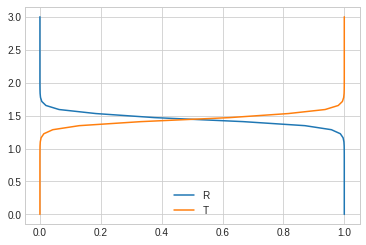

In [74]:
plt.plot(Rlist,p0list,label="R",)
plt.plot(Tlist,p0list,label="T")
plt.legend()
plt.show()